You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/ML%20spring%202023/Module%203-%20Linear%20Regression%20(Econometrics)%20approach)/Module%203-Linear_regression (Econometrics%20approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 




## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

### Prof. Pedram Jahangiry


# Linear Regression: Econometrics approach

* A linear Regression is a **linear approximation** of a **relationship** between conditional expectations of two or more variables. 
* It is important to note that **linear** implies the model is linear in **parameters**. So a linear regression model is perfectly able to fit both linear and nonlinear lines to the data. 
* In econometric approach, we will be using the [statsmodels api](https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html). Since version 0.5.0, statsmodels allows users to fit statistical models using **R-style** formulas. 
* Statsmodel is great for **interpretation aspect** of linear regression models.

Let's beging by importing the packages:

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df= pd.read_pickle("wage_clean.pkl")
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc
0,76900.0,40.0,93.0,12.0,11.0,2.0,31.0,1,0,8.0
1,80800.0,50.0,119.0,18.0,11.0,16.0,37.0,1,0,14.0
2,82500.0,40.0,108.0,14.0,11.0,9.0,33.0,1,0,14.0
3,65000.0,40.0,96.0,12.0,13.0,7.0,32.0,1,0,12.0
4,56200.0,40.0,74.0,11.0,14.0,5.0,34.0,1,0,6.0


In [25]:
# pay attention to the data types. If you were importing a csv file, you must have converted marreid and black into categorical variabls again! 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    float64 
 2   IQ       935 non-null    float64 
 3   educ     935 non-null    float64 
 4   exper    935 non-null    float64 
 5   tenure   935 non-null    float64 
 6   age      935 non-null    float64 
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    935 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 60.4 KB


In [30]:
df.describe().round(0)
# question, why round(0) is not rounded to 0 decimal here? 

,wage,hours,IQ,educ,exper,tenure,age,meduc
count,935.0,935.0,935.0,935.0,935.0,935.0,935.0,935.0
mean,95795.0,44.0,101.0,13.0,12.0,7.0,33.0,11.0
std,40436.0,7.0,15.0,2.0,4.0,5.0,3.0,3.0
min,11500.0,20.0,50.0,9.0,1.0,0.0,28.0,0.0
25%,66900.0,40.0,92.0,12.0,8.0,3.0,30.0,9.0
50%,90500.0,40.0,102.0,12.0,11.0,7.0,33.0,12.0
75%,116000.0,48.0,112.0,16.0,15.0,11.0,36.0,12.0
max,307800.0,80.0,145.0,18.0,23.0,22.0,38.0,18.0


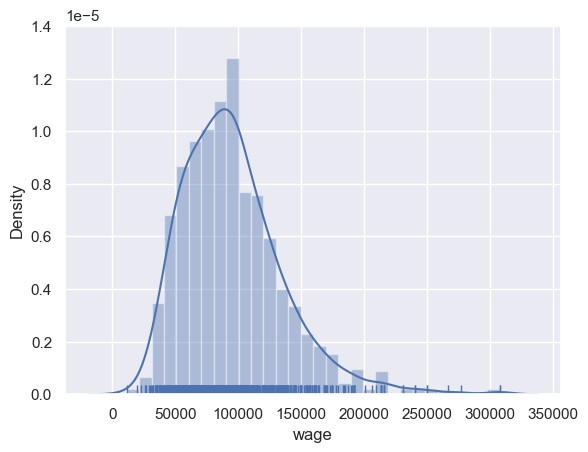

In [37]:
sns.distplot(df['wage'], bins=30, rug=True)
plt.show()

*Exercise*:
 
1. What do you learn by comparing the mean and median for wage? 
2. Which of the OLS assumptions is violated? What's the implication for econometrics linear regression analysis? 

---

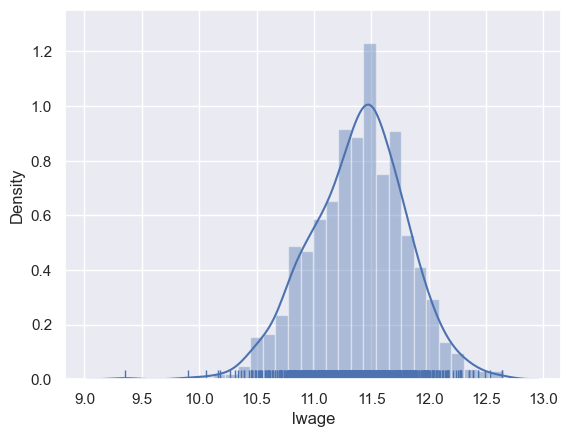

In [128]:
# Need to do log transformation to avoid potential heteroskedasticity.
df['lwage']= np.log(df['wage'])
sns.distplot(df['lwage'], bins=30 , rug=True)
plt.show()

In [40]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'lwage'],
      dtype='object')

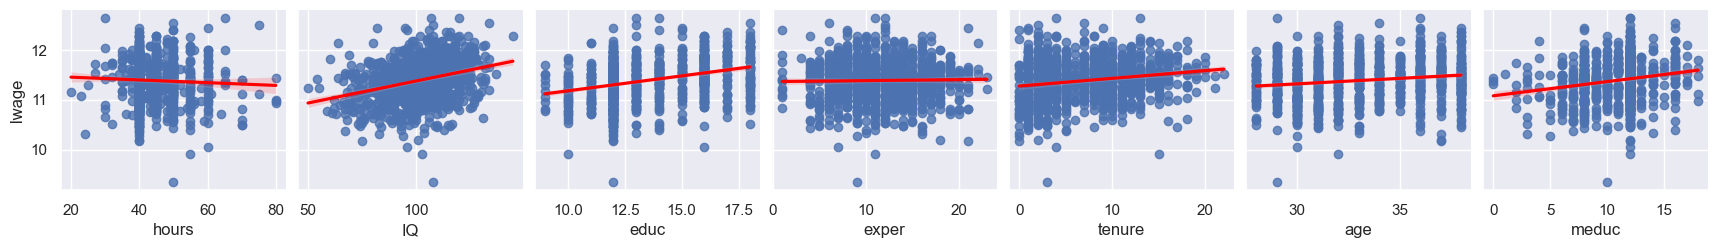

In [80]:
sns.pairplot(df, y_vars='lwage', x_vars=['hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc'], kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

### Multiple Regression Models with Statsmodel.formula api:

In [98]:
reg1 = smf.ols(formula= "lwage ~ IQ + educ", data=df).fit()
reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     69.42
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           7.88e-29
Time:                        23:05:52   Log-Likelihood:                -452.72
No. Observations:                 935   AIC:                             911.4
Df Residuals:                     932   BIC:                             926.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2635      0.096    106.643      0.000      10.075      10.452
IQ             0.0059      0.001      5.875      0.000       0.004       0.008
educ           0.0391      0.007      5.721      0.000       0.026       0.053
==============================================================================
Omnibus:                       35.757   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.770
Skew:                          -0.376   Prob(JB):                     4.23e-11
Kurtosis:                       3.813   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding categorical variables: 


In [133]:
# motivation: 
df.groupby(by=['married', 'black']).mean().round(1)

wage  hours     IQ  educ  exper  tenure   age  meduc  lwage
married black                                                                 
0       0       84197.6   43.5  105.2  14.1    9.8     6.7  32.0   11.1   11.3
        1       60011.1   42.1   86.8  12.8   11.9     3.9  32.8   10.4   11.0
1       0      100728.0   44.3  103.3  13.6   11.7     7.5  33.3   11.0   11.4
        1       75979.4   41.9   85.9  12.4   12.2     6.6  32.8    9.3   11.2

In [114]:
reg2 = smf.ols(formula= "np.log(wage) ~ IQ + educ + age + C(black) + C(married)", data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     44.37
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           4.06e-41
Time:                        23:18:05   Log-Likelihood:                -417.51
No. Observations:                 935   AIC:                             847.0
Df Residuals:                     929   BIC:                             876.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.5149      0.173     54.963      0.000       9.175       9.855
C(black)[T.1]      -0.1451      0.040     -3.592      0.000      -0.224      -0.066
C(married)[T.1]     0.1942      0.041      4.792      0.000       0.115       0.274
IQ                  0.0047      0.001      4.563      0.000       0.003       0.007
educ                0.0412      0.007      6.236      0.000       0.028       0.054
age                 0.0207      0.004      5.130      0.000       0.013       0.029
==============================================================================
Omnibus:                       39.678   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.349
Skew:                          -0.363   Prob(JB):                     7.86e-14
Kurtosis:                       4.011   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adding quadratic terms:

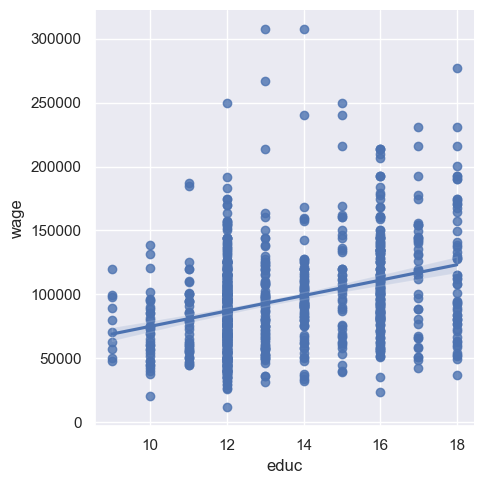

In [115]:
# motivation: 
sns.lmplot(data=df, x='educ', y='wage')
plt.show()

In [134]:
reg3 = smf.ols(formula= "wage ~ IQ + age + educ +   I(educ**2)+ C(black) + C(married)", data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     35.94
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.06e-39
Time:                        23:33:18   Log-Likelihood:                -11147.
No. Observations:                 935   AIC:                         2.231e+04
Df Residuals:                     928   BIC:                         2.234e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.242e+05   5.46e+04     -2.276      0.023   -2.31e+05   -1.71e+04
C(black)[T.1]   -1.139e+04   3890.603     -2.928      0.003    -1.9e+04   -3757.230
C(married)[T.1]  1.723e+04   3903.023      4.415      0.000    9571.951    2.49e+04
IQ                416.7047     99.710      4.179      0.000     221.021     612.389
age              1997.1617    395.119      5.055      0.000    1221.731    2772.592
educ             1.001e+04   7363.088      1.359      0.174   -4442.745    2.45e+04
I(educ ** 2)     -198.7737    259.316     -0.767      0.444    -707.688     310.141
==============================================================================
Omnibus:                      210.540   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.856
Skew:                           1.122   Prob(JB):                    1.01e-132
Kurtosis:                       6.251   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adding Interaction terms:

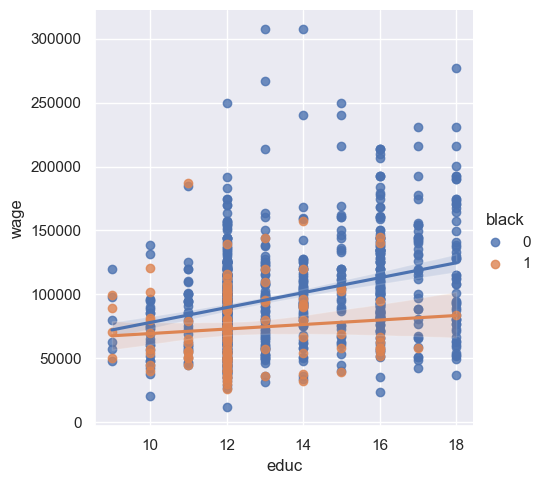

In [141]:
# motivation: 
sns.lmplot(data=df, x='educ', y='wage', hue='black')
plt.show()

In [144]:
reg4 = smf.ols(formula= "lwage ~ IQ + educ + I(educ*np.array(black))+ C(black) + C(married)", data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     38.63
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           4.32e-36
Time:                        23:37:48   Log-Likelihood:                -429.33
No. Observations:                 935   AIC:                             870.7
Df Residuals:                     929   BIC:                             899.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    10.1673      0.113     89.946      0.000       9.945      10.389
C(black)[T.1]                 0.2607      0.268      0.971      0.332      -0.266       0.787
C(married)[T.1]               0.2149      0.041      5.264      0.000       0.135       0.295
IQ                            0.0044      0.001      4.210      0.000       0.002       0.006
educ                          0.0446      0.007      6.453      0.000       0.031       0.058
I(educ * np.array(black))    -0.0332      0.021     -1.570      0.117      -0.075       0.008
==============================================================================
Omnibus:                       43.160   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.294
Skew:                          -0.390   Prob(JB):                     6.63e-15
Kurtosis:                       4.033   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It's worth noting that the process we're going throuhg is referred to as **feature engineering**. As you may have noticed, feature engineering is more of an art than a science and requires a combination of domain knowledge and expert opinion.

The END :)

---



#### Additional links:
1. Interpreting the statsmodel output! https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b
2. Optional: Regression diagnostics: https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html#